# Dengue Analysis Notebook.ipynb
# Importando as bibliotecas necessárias

Dados carregados com sucesso!

Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_iniSE        50 non-null     int64  
 1   SE                50 non-null     int64  
 2   casos_est         50 non-null     float64
 3   casos_est_min     50 non-null     int64  
 4   casos_est_max     50 non-null     int64  
 5   casos             50 non-null     int64  
 6   p_rt1             50 non-null     float64
 7   p_inc100k         50 non-null     float64
 8   Localidade_id     50 non-null     int64  
 9   nivel             50 non-null     int64  
 10  id                50 non-null     int64  
 11  versao_modelo     50 non-null     object 
 12  tweet             50 non-null     float64
 13  Rt                50 non-null     float64
 14  pop               50 non-null     float64
 15  tempmin           50 non-null     

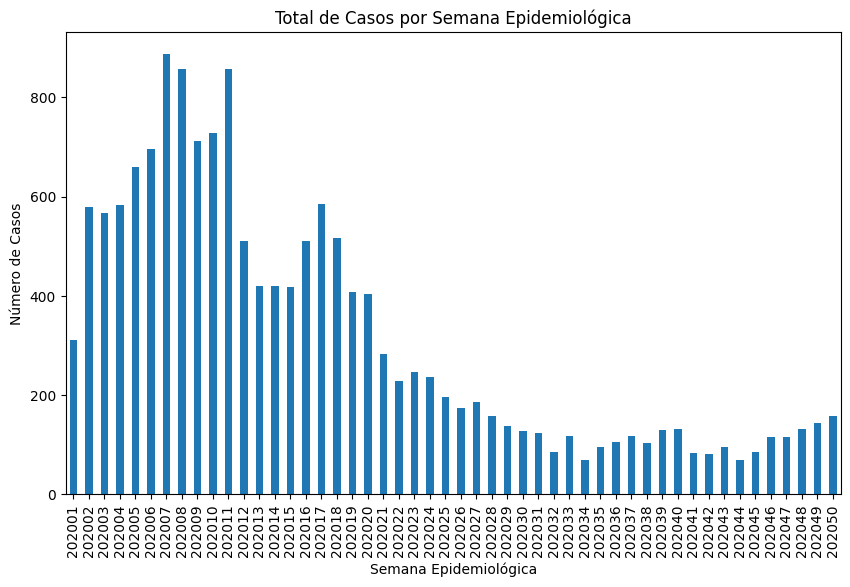

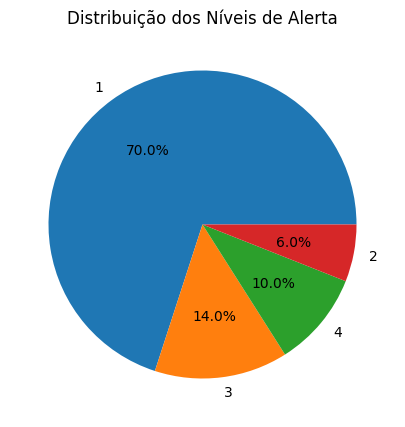

KeyError: "['latitude', 'longitude'] not in index"

In [5]:
# Dengue Heatmap Analysis Notebook.ipynb

# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Configurações para visualização dos gráficos no notebook
%matplotlib inline

# 1. Carregar o CSV
filename = "dengue_alerts_sao_paulo.csv"
data = pd.read_csv(filename)
print("Dados carregados com sucesso!")
data.head()

# 2. Exploração inicial dos dados
print("\nInformações sobre os dados:")
data.info()

print("\nDescrição estatística dos dados numéricos:")
print(data.describe())

# Verificar valores ausentes
missing_values = data.isnull().sum()
print("\nValores ausentes por coluna:")
print(missing_values)

# 3. Análises principais

# Análise 1: Casos por semana epidemiológica
plt.figure(figsize=(10, 6))
data.groupby("SE")["casos"].sum().plot(kind="bar")
plt.title("Total de Casos por Semana Epidemiológica")
plt.xlabel("Semana Epidemiológica")
plt.ylabel("Número de Casos")
plt.show()

# Análise 2: Distribuição dos níveis de alerta
plt.figure(figsize=(8, 5))
data["nivel"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribuição dos Níveis de Alerta")
plt.ylabel("")
plt.show()

# Análise 3: Casos de dengue ao longo do tempo (por data)
if "data" in data.columns:
    data["data"] = pd.to_datetime(data["data"], errors="coerce")  # Converter coluna de data
    plt.figure(figsize=(12, 6))
    data.groupby("data")["casos"].sum().plot()
    plt.title("Evolução dos Casos de Dengue ao Longo do Tempo")
    plt.xlabel("Data")
    plt.ylabel("Número de Casos")
    plt.show()

# 4. Análise avançada: Média móvel de casos (7 dias)
if "data" in data.columns:
    data = data.sort_values(by="data")
    data["media_movel"] = data["casos"].rolling(window=7).mean()
    plt.figure(figsize=(12, 6))
    plt.plot(data["data"], data["media_movel"], color="orange", label="Média Móvel (7 dias)")
    plt.plot(data["data"], data["casos"], alpha=0.5, label="Casos Diários")
    plt.legend()
    plt.title("Média Móvel de 7 dias para Casos de Dengue")
    plt.xlabel("Data")
    plt.ylabel("Número de Casos")
    plt.show()

# 5. Mapa de Calor para Visualização de Casos
# Para o mapa de calor, é necessário que as colunas de latitude e longitude estejam no dataframe.

# Exemplo: Assumindo que há duas colunas, 'latitude' e 'longitude' no dataset.
# Se estas colunas não estiverem disponíveis, substitua pelos dados apropriados de localização.
# Exemplo para adicionar coordenadas manualmente com base no `Localidade_id`
# Certifique-se de ter as coordenadas apropriadas para as localidades que deseja plotar.

# Dicionário de exemplo para coordenadas baseado no ID da localidade
coordinates_map = {
    3550308: (-23.55052, -46.633308),  # São Paulo
    3304557: (-22.9068, -43.1729),     # Rio de Janeiro
    4106902: (-25.4195, -49.2646),     # Curitiba
    # Adicione mais `Localidade_id` e coordenadas conforme necessário
}

# Criar as colunas 'latitude' e 'longitude' usando o `Localidade_id`
data["latitude"] = data["Localidade_id"].map(lambda x: coordinates_map.get(x, (None, None))[0])
data["longitude"] = data["Localidade_id"].map(lambda x: coordinates_map.get(x, (None, None))[1])

# Verifique se todas as coordenadas foram atribuídas corretamente
if data[['latitude', 'longitude']].isnull().any().any():
    print("Alguns IDs de localidade não possuem coordenadas definidas.")

# Agora é possível continuar com a criação do HeatMap
heat_data = data[["latitude", "longitude", "casos"]].dropna().values.tolist()

# Resto do código para gerar o mapa de calor
map_center = [-23.55052, -46.633308]  # Coordenadas de São Paulo como ponto central
heatmap_map = folium.Map(location=map_center, zoom_start=10)
HeatMap(heat_data, radius=12, max_zoom=13).add_to(heatmap_map)
heatmap_map.save("dengue_heatmap.html")
print("Mapa de calor salvo como 'dengue_heatmap.html'")

